# Load dataset and visualize features vs label

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 - Load CSV

In [26]:
df = pd.read_csv("Data/student_admission_dataset.csv")

In [27]:
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


- Encode label: map strings (Accepted/Rejected/Waitlisted) -> integers {0,1,2}

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
y = le.fit_transform(df["Admission_Status"])
label_map = {i: cls for i, cls in enumerate(le.classes_)}
print("Label mapping:", label_map)

Label mapping: {0: 'Accepted', 1: 'Rejected', 2: 'Waitlisted'}


- Two features to visualize (for decision boundary later we'll also use these two)

In [30]:
X_vis = df[["GPA", "SAT_Score"]].values

- Scatter plot: GPA vs SAT colored by status

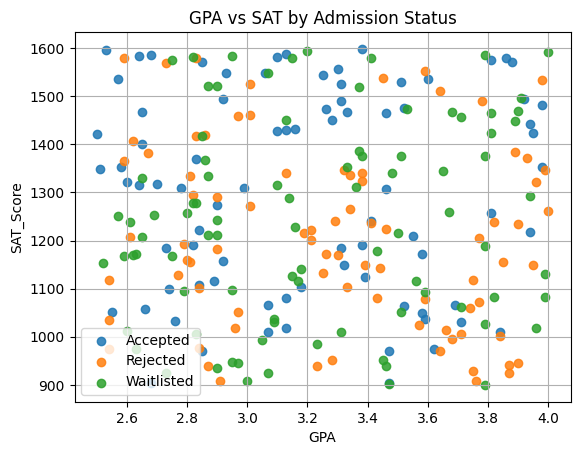

In [31]:
plt.figure()
for cls, name in label_map.items():
    mask = (y == cls)
    plt.scatter(X_vis[mask, 0], X_vis[mask, 1], alpha=0.85, label=name)

plt.xlabel("GPA")
plt.ylabel("SAT_Score")
plt.title("GPA vs SAT by Admission Status")
plt.legend()
plt.grid(True)
plt.show()

# Train a logistic regression model.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

-  we will use two features to allow 2D decision boundary later

In [33]:
X = df[["GPA", "SAT_Score"]].values

- Pipeline:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [35]:
clf2d = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver="lbfgs")  # multinomial handled automatically
)

- Train

In [36]:
clf2d.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [37]:
print("Model trained on features: [GPA, SAT_Score].")
print("Classes (encoded -> original):", {i: cls for i, cls in enumerate(le.classes_)})
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Model trained on features: [GPA, SAT_Score].
Classes (encoded -> original): {0: 'Accepted', 1: 'Rejected', 2: 'Waitlisted'}
Train shape: (175, 2) | Test shape: (75, 2)


# Plot the decision boundary.

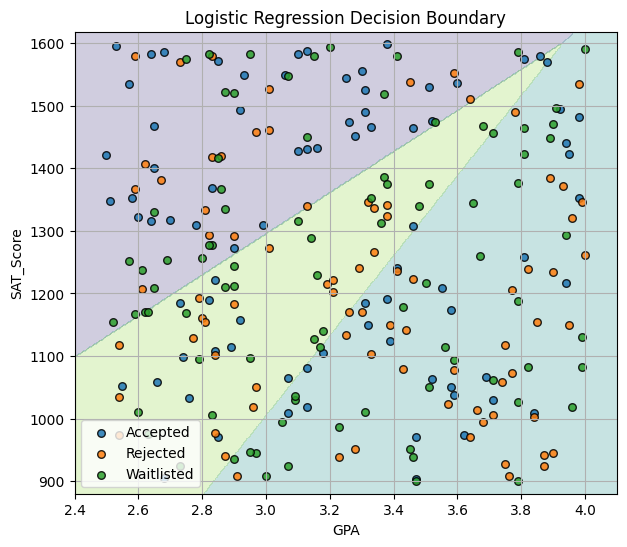

In [38]:
# (c) Plot the decision boundary for multinomial Logistic Regression (2D)

import numpy as np
import matplotlib.pyplot as plt

# 1) Define a mesh/grid over the GPA–SAT plane (with a small padding)
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1  # GPA range
x2_min, x2_max = X[:, 1].min() - 20,  X[:, 1].max() + 20   # SAT range
xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 400),
    np.linspace(x2_min, x2_max, 400)
)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# 2) Predict class on the grid using the trained pipeline (scaling happens inside)
Z = clf2d.predict(grid).reshape(xx1.shape)   # values in {0,1,2}

# 3) Plot background regions (predicted class) + training points
plt.figure(figsize=(7, 6))
# Filled contours for class regions
plt.contourf(xx1, xx2, Z, alpha=0.25, levels=[-0.5,0.5,1.5,2.5])

# Overlay training points colored by true class
for cls, name in enumerate(le.classes_):
    mask = (y == cls)
    plt.scatter(X[mask, 0], X[mask, 1], s=30, edgecolor='k', alpha=0.85, label=name)

plt.xlabel("GPA")
plt.ylabel("SAT_Score")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()


Test Accuracy: 0.440
Confusion Matrix (counts):
 [[12  7  5]
 [ 5 11  8]
 [ 4 13 10]]


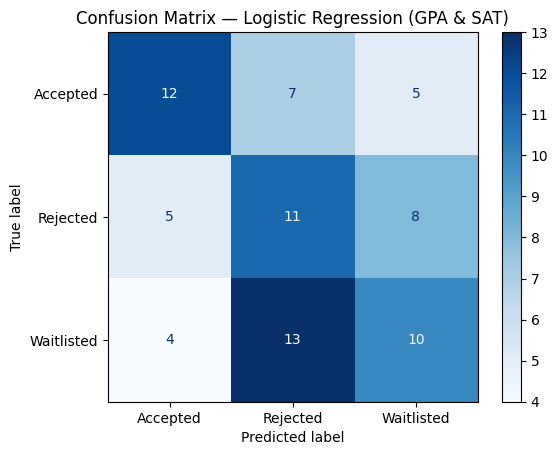


Classification Report:
              precision    recall  f1-score   support

    Accepted      0.571     0.500     0.533        24
    Rejected      0.355     0.458     0.400        24
  Waitlisted      0.435     0.370     0.400        27

    accuracy                          0.440        75
   macro avg      0.454     0.443     0.444        75
weighted avg      0.453     0.440     0.443        75



In [39]:
# (d) Evaluate performance on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1) Predictions
y_pred = clf2d.predict(X_test)

# 2) Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")

# 3) Confusion matrix (counts)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (counts):\n", cm)

# 4) Nicely plotted confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(values_format="d", cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression (GPA & SAT)")
plt.show()

# 5) Classification report (per-class precision/recall/F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=3))
